In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Make plots a bit bigger
plt.rcParams["figure.figsize"] = (6, 4)

# Load StudentsPerformance.csv directly from GitHub
url = "https://raw.githubusercontent.com/abhijitpaul0212/DS-ML-DataSet/main/StudentsPerformance.csv"
df = pd.read_csv(url)

# Quick check
print(df.head())
print(df.columns)



   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing sco

Counts:
 none         642
completed    358
Name: test preparation course, dtype: int64

Proportions:
 none         0.642
completed    0.358
Name: test preparation course, dtype: float64


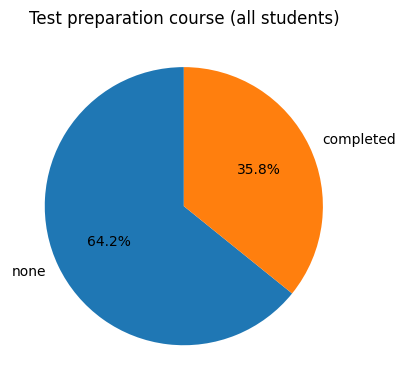

In [5]:
# 10.1 – Test preparation course: pie vs stacked bar

# Count how many students completed / didn't complete test prep
prep_counts = df["test preparation course"].value_counts()
prep_props = prep_counts / prep_counts.sum()

print("Counts:\n", prep_counts)
print("\nProportions:\n", prep_props)

# ---- Pie chart ----
plt.figure()
plt.pie(
    prep_counts,
    labels=prep_counts.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Test preparation course (all students)")
plt.tight_layout()
plt.show()




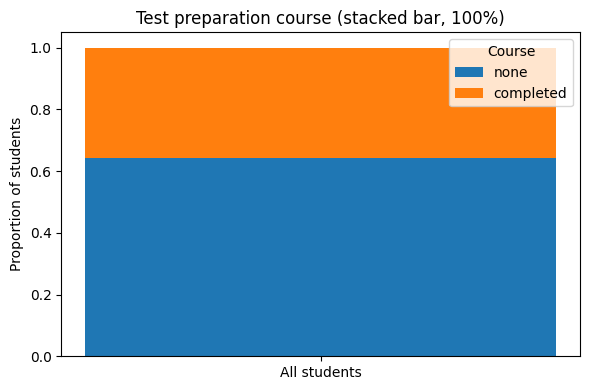

In [7]:
# ---- Single 100% stacked bar ----
plt.figure()
categories = prep_props.index.tolist()
bottom = 0
for cat in categories:
    plt.bar(
        ["All students"],           # x-position (single bar)
        [prep_props[cat]],          # height = proportion
        bottom=bottom,              # stack on previous
        label=cat
    )
    bottom += prep_props[cat]

plt.ylabel("Proportion of students")
plt.title("Test preparation course (stacked bar, 100%)")
plt.legend(title="Course")
plt.tight_layout()
plt.show()

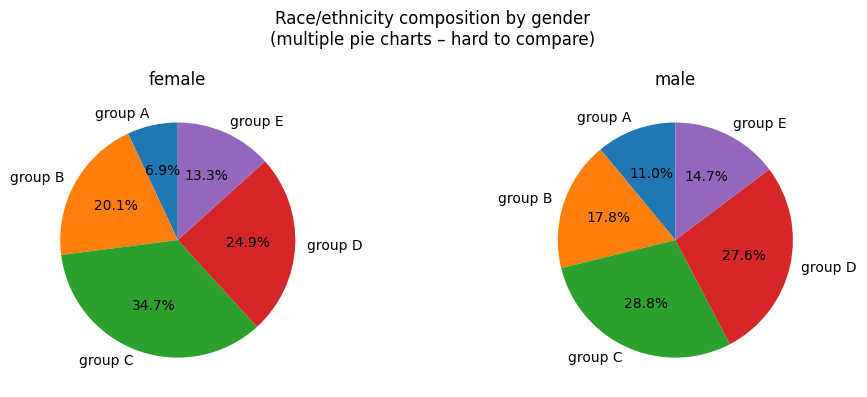

In [4]:
# 10.2 (extra) – "Bad" version: multiple pie charts instead of bars

# We reuse race_pivot from before:
# rows = gender, columns = race/ethnicity, values = proportion

fig, axes = plt.subplots(1, len(race_pivot.index), figsize=(10, 4))

for ax, gender in zip(axes, race_pivot.index):
    data = race_pivot.loc[gender].dropna()  # proportions for this gender

    ax.pie(
        data.values,
        labels=data.index,
        autopct="%1.1f%%",
        startangle=90
    )
    ax.set_title(gender)

plt.suptitle("Race/ethnicity composition by gender\n(multiple pie charts – hard to compare)")
plt.tight_layout()
plt.show()


   gender race/ethnicity  count      prop
0  female        group A     36  0.069498
1  female        group B    104  0.200772
2  female        group C    180  0.347490
3  female        group D    129  0.249035
4  female        group E     69  0.133205

Proportion table (rows=gender, cols=race/ethnicity):

race/ethnicity   group A   group B   group C   group D   group E
gender                                                          
female          0.069498  0.200772  0.347490  0.249035  0.133205
male            0.109959  0.178423  0.288382  0.275934  0.147303


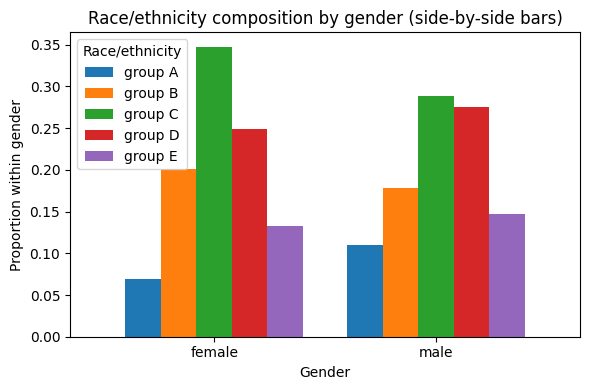

In [3]:
# 10.2 – Race/ethnicity proportions by gender: side-by-side bars

# Count students by gender and race/ethnicity
race_by_gender = (
    df.groupby(["gender", "race/ethnicity"])
      .size()
      .reset_index(name="count")
)

# Convert counts to proportions within each gender
race_by_gender["prop"] = (
    race_by_gender
    .groupby("gender")["count"]
    .transform(lambda x: x / x.sum())
)

print(race_by_gender.head())

# Pivot to gender (rows) x race/ethnicity (columns)
race_pivot = race_by_gender.pivot(
    index="gender",
    columns="race/ethnicity",
    values="prop"
)

print("\nProportion table (rows=gender, cols=race/ethnicity):\n")
print(race_pivot)

# Plot: side-by-side (grouped) bars
ax = race_pivot.plot(
    kind="bar",
    stacked=False,
    width=0.8
)

ax.set_ylabel("Proportion within gender")
ax.set_xlabel("Gender")
ax.set_title("Race/ethnicity composition by gender (side-by-side bars)")
plt.xticks(rotation=0)
plt.legend(title="Race/ethnicity")
plt.tight_layout()
plt.show()


10.2 – Multiple pies (bad) vs side-by-side bars (good)

Figure 10.2a – Multiple pie charts by gender (bad design)

Here each pie shows the race/ethnicity composition within one gender. While each individual pie is readable, it is very hard to compare slices across pies (e.g., “Is group B more common for males or females?”). This matches the lecture example where multiple pies over years are labeled as a poor design for comparisons.

Figure 10.2b – Side-by-side bars of race/ethnicity by gender (good design)

This grouped bar chart shows the same information, but now the race/ethnicity categories are bars on a common scale within each gender. Differences between genders are easy to compare by looking at bar heights. This illustrates why side-by-side bars are preferred when the goal is to compare proportions across groups.

test preparation course  completed      none
math_band                                   
<50                       0.220000  0.780000
50–69                     0.342048  0.657952
70–89                     0.401760  0.598240
90–100                    0.620000  0.380000


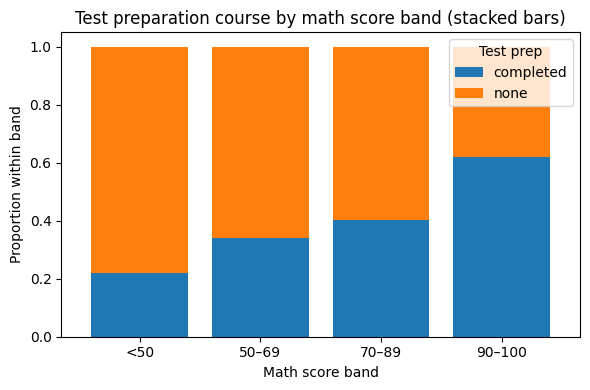

In [8]:
# 10.3(a) – Stacked bars: test prep vs math score bands

# Define math score bands
bins = [0, 50, 70, 90, 100]
labels = ["<50", "50–69", "70–89", "90–100"]

df["math_band"] = pd.cut(
    df["math score"],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# Crosstab: proportion of test-prep categories within each band
band_preptable = pd.crosstab(
    df["math_band"],
    df["test preparation course"],
    normalize="index"
)

print(band_preptable)

# Plot stacked bars (100% within each band)
ax = band_preptable.plot(
    kind="bar",
    stacked=True,
    width=0.8
)
ax.set_ylabel("Proportion within band")
ax.set_xlabel("Math score band")
ax.set_title("Test preparation course by math score band (stacked bars)")
plt.xticks(rotation=0)
plt.legend(title="Test prep")
plt.tight_layout()
plt.show()


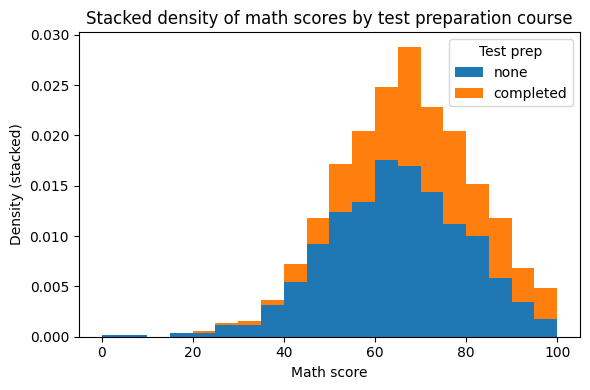

In [9]:
# 10.3(b) – Stacked histogram (density) of math score by test prep

scores_none = df.loc[df["test preparation course"] == "none", "math score"]
scores_completed = df.loc[df["test preparation course"] == "completed", "math score"]

plt.figure()
plt.hist(
    [scores_none, scores_completed],
    bins=20,
    stacked=True,
    density=True,
    label=["none", "completed"]
)
plt.xlabel("Math score")
plt.ylabel("Density (stacked)")
plt.title("Stacked density of math scores by test preparation course")
plt.legend(title="Test prep")
plt.tight_layout()
plt.show()


10.3 – Stacked bars and stacked densities

Figure 10.3a – 100% stacked bars of test prep by math score band

Math scores are split into bands (<50, 50–69, 70–89, 90–100), and within each band the bar is stacked into “none” vs “completed” test prep. Each bar sums to 100% of students in that band. Higher score bands have a larger share of students who completed test prep, while lower bands have more students with no prep. This is similar to the textbook’s example of stacked bars showing composition over conditions.

Figure 10.3b – Stacked histogram (stacked density) of math scores

The stacked histogram shows the overall density of math scores, with contributions from the “none” and “completed” test-prep groups stacked on top of each other. At low scores the density is dominated by students with no test prep, whereas at high scores it is dominated by students who completed test prep. This is the stacked-density idea from the chapter, showing how category composition changes along a continuous axis.

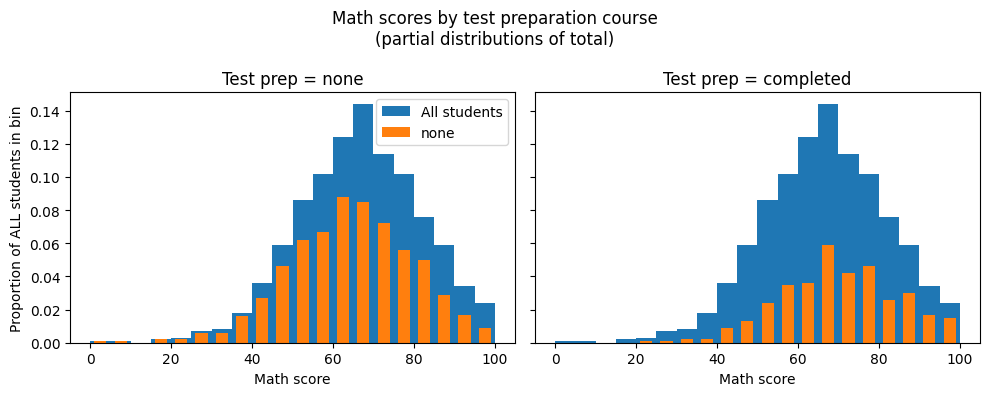

In [10]:
# 10.4 – Partial distributions:
# show each test-prep group as part of the total math-score distribution

N = len(df)
values = df["math score"].values

# Common binning for all histograms
bin_edges = np.linspace(0, 100, 21)        # 20 bins from 0 to 100
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
bin_width = bin_edges[1] - bin_edges[0]

# Overall distribution: proportion of ALL students in each bin
overall_counts, _ = np.histogram(values, bins=bin_edges)
overall_prop = overall_counts / N          # sums to 1

# Helper: partial proportions for a subset (still divided by TOTAL N)
def partial_props(subset):
    sub_vals = subset["math score"].values
    sub_counts, _ = np.histogram(sub_vals, bins=bin_edges)
    return sub_counts / N

groups = ["none", "completed"]

fig, axes = plt.subplots(1, len(groups), figsize=(10, 4), sharey=True)

for ax, g in zip(axes, groups):
    subset = df[df["test preparation course"] == g]
    part_prop = partial_props(subset)

    # Overall distribution in background
    ax.bar(
        bin_centers,
        overall_prop,
        width=bin_width,
        edgecolor="none",
        label="All students"
    )

    # Group-specific partial distribution on top (narrower)
    ax.bar(
        bin_centers,
        part_prop,
        width=bin_width * 0.6,
        edgecolor="none",
        label=g
    )

    ax.set_title(f"Test prep = {g}")
    ax.set_xlabel("Math score")

axes[0].set_ylabel("Proportion of ALL students in bin")
axes[0].legend()
plt.suptitle("Math scores by test preparation course\n(partial distributions of total)")
plt.tight_layout()
plt.show()


10.4 – Partial distributions as parts of the total

Figure 10.4 – Partial distributions of math scores by test preparation course

These two panels show partial distributions for the two test-prep groups. In each panel, the gray bars represent the overall math-score distribution (all students), and the colored bars show the proportion of all students who are in that score bin and in that specific test-prep group. For the “completed” group, the colored bars are concentrated at higher scores; for the “none” group they are shifted toward lower and mid scores. This follows the chapter’s idea of viewing each group as a part of the total distribution, rather than stacking everything in a single figure.

# CHAPTER 11

Parental education percentages:
 associate's degree    22.2
bachelor's degree     11.8
high school           19.6
master's degree        5.9
some college          22.6
some high school      17.9
Name: parental level of education, dtype: float64

Test prep percentages:
 completed    35.8
none         64.2
Name: test preparation course, dtype: float64

Sum of all slice percentages (SHOULD NOT be >100 for a valid pie): 200.0


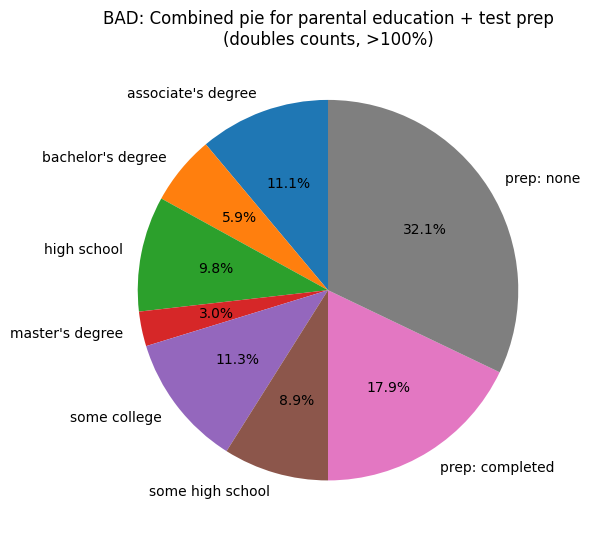


Data for mixed bar chart:
              category  percentage               group
0  associate's degree        22.2  Parental education
1   bachelor's degree        11.8  Parental education
2         high school        19.6  Parental education
3     master's degree         5.9  Parental education
4        some college        22.6  Parental education
5    some high school        17.9  Parental education
6           completed        35.8           Test prep
7                none        64.2           Test prep


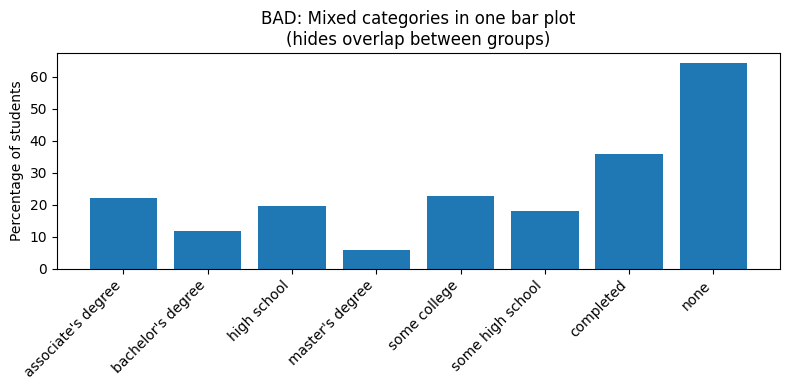

In [12]:
# ==========================
# CHAPTER 11.1 – Nested proportions gone wrong
# ==========================

top_var = "parental level of education"
sub_var = "test preparation course"

# 1) Percentages by parental education (sum to 100%)
parent_props = (
    df[top_var]
      .value_counts(normalize=True)
      .sort_index()
      * 100
)

# 2) Percentages by test prep (also sum to 100%)
prep_props = (
    df[sub_var]
      .value_counts(normalize=True)
      .sort_index()
      * 100
)

print("Parental education percentages:\n", parent_props)
print("\nTest prep percentages:\n", prep_props)

# ---------------------------------------------------------
# 11.1(a) BAD EXAMPLE – Combined pie that double-counts
# ---------------------------------------------------------

# Build one big list of slices:
#   - all parental education categories
#   - all test prep categories
labels = list(parent_props.index) + [f"prep: {x}" for x in prep_props.index]
sizes = list(parent_props.values) + list(prep_props.values)

print("\nSum of all slice percentages (SHOULD NOT be >100 for a valid pie):",
      sum(sizes))

plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("BAD: Combined pie for parental education + test prep\n(doubles counts, >100%)")
plt.tight_layout()
plt.show()


# ---------------------------------------------------------
# 11.1(b) BAD / MISLEADING – Mixed bar chart
# ---------------------------------------------------------

# Put both sets of percentages into one table
bad_bar = (
    pd.concat([
        parent_props.rename("percentage"),
        prep_props.rename("percentage")
    ])
    .reset_index()
)

bad_bar.rename(columns={"index": "category"}, inplace=True)

# Tag which group each category belongs to
bad_bar["group"] = np.where(
    bad_bar["category"].isin(parent_props.index),
    "Parental education",
    "Test prep"
)

print("\nData for mixed bar chart:\n", bad_bar)

plt.figure(figsize=(8, 4))
plt.bar(bad_bar["category"], bad_bar["percentage"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Percentage of students")
plt.title("BAD: Mixed categories in one bar plot\n(hides overlap between groups)")
plt.tight_layout()
plt.show()




Figure 11.1(a) – BAD combined pie

I combined the percentages of parental education levels and test-preparation completion into a single pie chart. The slices sum to more than 100%, because each student is counted once in a parental-education category and again in a test-prep category. A pie chart implies mutually exclusive categories that add up to one whole, which is violated here, so this is a “nested proportions gone wrong” example.

Figure 11.1(b) – BAD / misleading bar chart

The bar chart shows the same percentages as separate bars. This plot is not mathematically wrong, since bar heights don’t need to add to 100%. However, it is conceptually misleading: it suggests many independent categories, even though all test-prep bars are just another way of slicing the same students that already appear in the parental-education bars. The overlap between groups is completely hidden.

Crosstab of parental education × test prep:

test preparation course      completed  none
parental level of education                 
associate's degree                  82   140
bachelor's degree                   46    72
high school                         56   140
master's degree                     20    39
some college                        77   149
some high school                    77   102


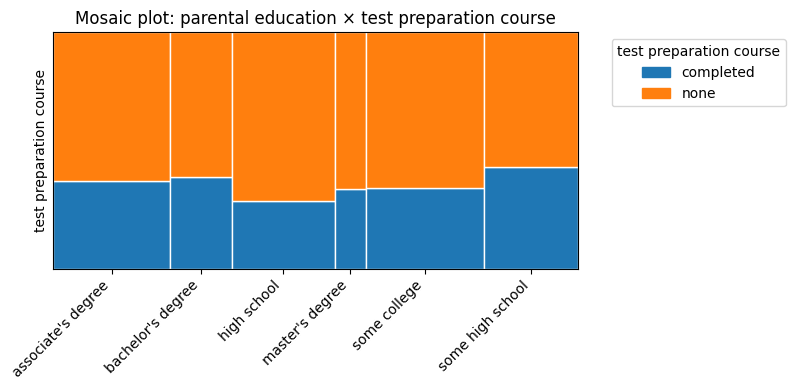

In [13]:
# ==========================
# CHAPTER 11.2 – Mosaic plots and treemaps
# 11.2(a) Mosaic-style plot
# ==========================

top_var = "parental level of education"
sub_var = "test preparation course"

# Cross-tabulation: counts for each combination
ct = pd.crosstab(df[top_var], df[sub_var])
print("Crosstab of parental education × test prep:\n")
print(ct)

total = ct.to_numpy().sum()

# Order of categories
top_levels = ct.index.tolist()
sub_levels = ct.columns.tolist()

# Colors for the nested variable
color_cycle = plt.rcParams["axes.prop_cycle"].by_key()["color"]
colors = {lev: color_cycle[i % len(color_cycle)] for i, lev in enumerate(sub_levels)}

fig, ax = plt.subplots(figsize=(8, 4))

x_offset = 0.0
x_centers = []
x_labels = []

for top in top_levels:
    # Width of strip = proportion of ALL students with this parental education
    parent_total = ct.loc[top].sum()
    if parent_total == 0:
        continue

    width = parent_total / total
    y_offset = 0.0

    for sub in sub_levels:
        count = ct.loc[top, sub]
        if count == 0:
            continue

        # Height = proportion of this subgroup within that parental-education group
        height = count / parent_total

        rect = plt.Rectangle(
            (x_offset, y_offset),
            width,
            height,
            facecolor=colors[sub],
            edgecolor="white"
        )
        ax.add_patch(rect)

        y_offset += height

    # Center of this strip (for x tick)
    x_centers.append(x_offset + width / 2)
    x_labels.append(top)
    x_offset += width

# Formatting
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xticks(x_centers)
ax.set_xticklabels(x_labels, rotation=45, ha="right")
ax.set_yticks([])
ax.set_ylabel(sub_var)
ax.set_title("Mosaic plot: parental education × test preparation course")

# Legend for nested variable
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[s]) for s in sub_levels]
ax.legend(handles, sub_levels, title=sub_var, bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


Data used for treemap-style plot:
    parental level of education test preparation course  count
0           associate's degree               completed     82
1           associate's degree                    none    140
2            bachelor's degree               completed     46
3            bachelor's degree                    none     72
4                  high school               completed     56
5                  high school                    none    140
6              master's degree               completed     20
7              master's degree                    none     39
8                 some college               completed     77
9                 some college                    none    149
10            some high school               completed     77
11            some high school                    none    102


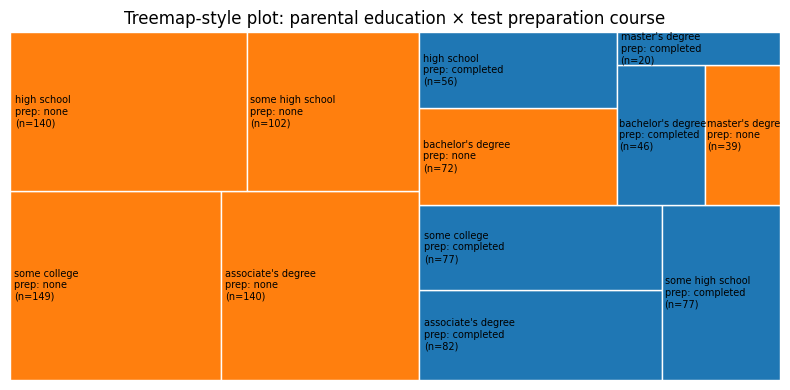

In [15]:
# 11.2(b) Treemap-style plot: parental education × test prep
# (pure Matplotlib, no squarify needed)

top_var = "parental level of education"
sub_var = "test preparation course"

# Crosstab (in case it's not defined in this cell)
ct = pd.crosstab(df[top_var], df[sub_var])

# Flatten to long format: one row per (parent ed, test prep) combo
treemap_df = (
    ct.stack()
      .reset_index(name="count")
)

print("Data used for treemap-style plot:\n", treemap_df)

# ----- simple recursive treemap layout (slice-and-dice) -----
def treemap_layout(items, x=0.0, y=0.0, w=1.0, h=1.0, horizontal=True):
    """
    items: list of (id, size)
    returns: list of dicts {id, x, y, w, h}
    """
    if not items:
        return []
    if len(items) == 1:
        id_, size = items[0]
        return [{"id": id_, "x": x, "y": y, "w": w, "h": h}]

    # sort by size (largest first) for nicer layout
    items = sorted(items, key=lambda t: t[1], reverse=True)
    total = sum(size for _, size in items)

    # split into two groups with roughly half the total size each
    acc = 0.0
    split_idx = 0
    for i, (_, s) in enumerate(items):
        if acc >= total / 2 and i > 0:
            break
        acc += s
        split_idx = i + 1

    group1 = items[:split_idx]
    group2 = items[split_idx:]
    sum1 = sum(s for _, s in group1)
    sum2 = total - sum1

    rects = []
    if horizontal:
        # split horizontally into left + right rectangles
        w1 = w * (sum1 / total)
        w2 = w - w1
        rects += treemap_layout(group1, x,       y, w1, h, horizontal=False)
        rects += treemap_layout(group2, x + w1, y, w2, h, horizontal=False)
    else:
        # split vertically into bottom + top rectangles
        h1 = h * (sum1 / total)
        h2 = h - h1
        rects += treemap_layout(group1, x, y,       w, h1, horizontal=True)
        rects += treemap_layout(group2, x, y + h1, w, h2, horizontal=True)

    return rects

# Build list of (id, size)
items = list(zip(treemap_df.index, treemap_df["count"].astype(float)))
rects = treemap_layout(items)

# Color by test-prep status for consistency with mosaic plot
color_cycle = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_map = {
    "completed": color_cycle[0],
    "none":      color_cycle[1] if len(color_cycle) > 1 else color_cycle[0],
}

fig, ax = plt.subplots(figsize=(8, 4))

for r in rects:
    row = treemap_df.loc[r["id"]]
    parent = row[top_var]
    prep   = row[sub_var]
    count  = row["count"]

    # Rectangle
    rect = plt.Rectangle(
        (r["x"], r["y"]),
        r["w"],
        r["h"],
        facecolor=color_map.get(prep, "gray"),
        edgecolor="white"
    )
    ax.add_patch(rect)

    # Label (small, may be truncated if the box is tiny)
    label = f"{parent}\nprep: {prep}\n(n={count})"
    ax.text(
        r["x"] + r["w"] * 0.02,
        r["y"] + r["h"] * 0.5,
        label,
        fontsize=7,
        va="center",
        ha="left",
        clip_on=True
    )

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis("off")
ax.set_title("Treemap-style plot: parental education × test preparation course")

plt.tight_layout()
plt.show()


The treemap-style plot divides the full plotting area into rectangles whose area is proportional to the number of students in each combination of parental education level and test-preparation status. All rectangles together represent the entire sample. Colors encode test-preparation status, while text labels show the parent-education category and the group size. Like the mosaic plot, this correctly visualizes nested proportions, but here the rectangles are arranged in a free-form tiling rather than a strict grid.

Top-level counts (gender):
 female    518
male      482
Name: gender, dtype: int64 

Nested counts (gender × test prep):
 gender  test preparation course
female  completed                  184
        none                       334
male    completed                  174
        none                       308
dtype: int64 

Outer sizes (gender × test prep, flattened):
 [184, 334, 174, 308] 



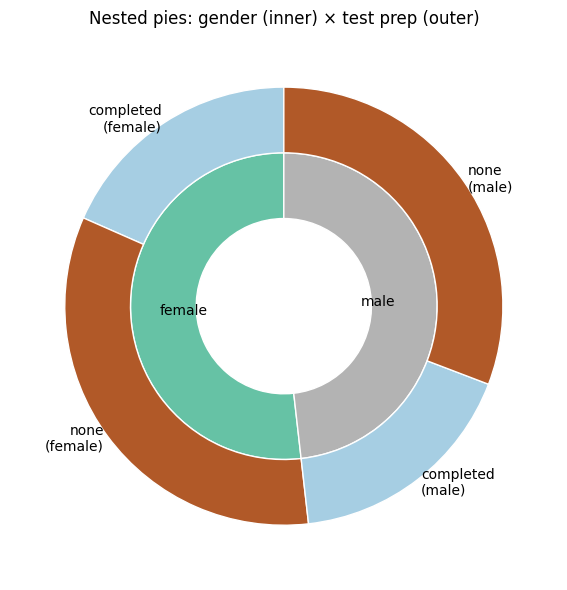

In [16]:
# ==========================
# CHAPTER 11.3 – Nested pies
# gender (inner ring) × test preparation course (outer ring)
# ==========================

top_var = "gender"
sub_var = "test preparation course"

# Drop rows with missing values in these columns
data = df.dropna(subset=[top_var, sub_var])

# Top-level counts (inner ring)
top_counts = (
    data[top_var]
    .value_counts()
    .sort_index()
)
top_levels = top_counts.index.tolist()
print("Top-level counts (gender):\n", top_counts, "\n")

# Nested counts (outer ring): gender × test prep
nested_counts = (
    data.groupby([top_var, sub_var])
        .size()
        .sort_index()
)
print("Nested counts (gender × test prep):\n", nested_counts, "\n")

# Make sure we have a consistent order for subcategories
sub_levels = (
    data[sub_var]
    .value_counts()
    .sort_index()
    .index
    .tolist()
)

# Build outer ring sizes in order: for each gender, each test-prep level
outer_sizes = []
outer_labels = []

for g in top_levels:
    for prep in sub_levels:
        count = nested_counts.get((g, prep), 0)
        outer_sizes.append(count)
        # label shows test prep and gender
        outer_labels.append(f"{prep}\n({g})")

print("Outer sizes (gender × test prep, flattened):\n", outer_sizes, "\n")

# ---- Colors ----
import numpy as np
import matplotlib.pyplot as plt

# Inner colors: one color per gender
inner_colors = plt.cm.Set2(np.linspace(0, 1, len(top_levels)))

# Outer colors: color by test prep status for consistency
sub_color_map = {
    sub_levels[i]: plt.cm.Paired(i / max(1, len(sub_levels) - 1))
    for i in range(len(sub_levels))
}

outer_colors = []
for g in top_levels:
    for prep in sub_levels:
        outer_colors.append(sub_color_map[prep])

# ---- Plot nested pies ----
fig, ax = plt.subplots(figsize=(6, 6))

# Inner ring (gender)
inner_wedges, _ = ax.pie(
    top_counts.values,
    radius=0.7,
    labels=top_levels,
    labeldistance=0.5,
    colors=inner_colors,
    startangle=90,
    wedgeprops=dict(width=0.3, edgecolor="white")
)

# Outer ring (test prep within gender)
outer_wedges, _ = ax.pie(
    outer_sizes,
    radius=1.0,
    labels=outer_labels,
    labeldistance=1.02,
    colors=outer_colors,
    startangle=90,
    wedgeprops=dict(width=0.3, edgecolor="white")
)

ax.set(aspect="equal")
ax.set_title("Nested pies: gender (inner) × test prep (outer)")

plt.tight_layout()
plt.show()


Figure 11.3 – Nested pies for gender and test preparation course.
The inner ring shows the proportion of female versus male students in the sample. The outer ring breaks each gender slice into students who completed the test-preparation course and those who did not. The area and angle of each outer wedge represent the fraction of all students in that gender–test-prep combination. This is a nested-pies visualization of the same nested proportions we showed earlier with mosaic and treemap plots.

Total students used in parallel sets: 1000

Left axis (parental education) counts:
 associate's degree    222
bachelor's degree     118
high school           196
master's degree        59
some college          226
some high school      179
Name: parental level of education, dtype: int64

Right axis (test prep) counts:
 completed    358
none         642
Name: test preparation course, dtype: int64

Left segments (y_bottom, y_top): {"associate's degree": (0.0, 0.222), "bachelor's degree": (0.222, 0.33999999999999997), 'high school': (0.33999999999999997, 0.536), "master's degree": (0.536, 0.595), 'some college': (0.595, 0.821), 'some high school': (0.821, 1.0)}
Right segments (y_bottom, y_top): {'completed': (0.0, 0.358), 'none': (0.358, 1.0)}

Cross-tab flows:
    parental level of education test preparation course  count
0           associate's degree               completed     82
1           associate's degree                    none    140
2            bachelor's degree              

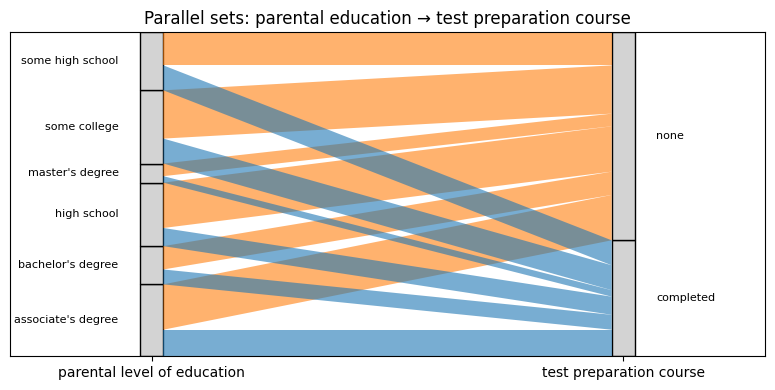

In [17]:
# ==========================
# CHAPTER 11.4 – Parallel sets
# parental level of education  →  test preparation course
# ==========================

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, PathPatch
from matplotlib.path import Path

var_left = "parental level of education"
var_right = "test preparation course"

data = df.dropna(subset=[var_left, var_right])

total = len(data)
print("Total students used in parallel sets:", total)

# ----------------------------------
# 1) Category order and segment sizes on each axis
# ----------------------------------

# Left axis categories (parental education)
left_counts = (
    data[var_left]
    .value_counts()
    .sort_index()
)
left_levels = left_counts.index.tolist()
left_heights = (left_counts / total).tolist()
print("\nLeft axis (parental education) counts:\n", left_counts)

# Right axis categories (test prep)
right_counts = (
    data[var_right]
    .value_counts()
    .sort_index()
)
right_levels = right_counts.index.tolist()
right_heights = (right_counts / total).tolist()
print("\nRight axis (test prep) counts:\n", right_counts)

# Compute y-positions for category segments on each axis
def compute_segments(levels, heights):
    """Given ordered levels and their relative heights (sum <= 1),
       return dict[level] -> (y_bottom, y_top) along [0, 1]."""
    segs = {}
    y = 0.0
    for lev, h in zip(levels, heights):
        segs[lev] = (y, y + h)
        y += h
    return segs

left_segments = compute_segments(left_levels, left_heights)
right_segments = compute_segments(right_levels, right_heights)

print("\nLeft segments (y_bottom, y_top):", left_segments)
print("Right segments (y_bottom, y_top):", right_segments)

# ----------------------------------
# 2) Cross-tab (flows) between left and right
# ----------------------------------

cross = (
    data.groupby([var_left, var_right])
        .size()
        .reset_index(name="count")
)

print("\nCross-tab flows:\n", cross)

# For each side we need running offsets within each category
left_offsets = {lev: left_segments[lev][0] for lev in left_levels}
right_offsets = {lev: right_segments[lev][0] for lev in right_levels}

# ----------------------------------
# 3) Plot parallel sets
# ----------------------------------

fig, ax = plt.subplots(figsize=(8, 4))

# Positions of the two axes
x_left = 0.0
x_right = 1.0
bar_width = 0.05

# ---- Draw category bars on left axis ----
for lev in left_levels:
    y0, y1 = left_segments[lev]
    rect = Rectangle(
        (x_left - bar_width / 2, y0),
        bar_width,
        y1 - y0,
        facecolor="lightgray",
        edgecolor="black"
    )
    ax.add_patch(rect)
    ax.text(
        x_left - 0.07,
        (y0 + y1) / 2,
        lev,
        va="center",
        ha="right",
        fontsize=8
    )

# ---- Draw category bars on right axis ----
for lev in right_levels:
    y0, y1 = right_segments[lev]
    rect = Rectangle(
        (x_right - bar_width / 2, y0),
        bar_width,
        y1 - y0,
        facecolor="lightgray",
        edgecolor="black"
    )
    ax.add_patch(rect)
    ax.text(
        x_right + 0.07,
        (y0 + y1) / 2,
        lev,
        va="center",
        ha="left",
        fontsize=8
    )

# ---- Colors for flows: color by test prep (right variable) ----
color_cycle = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_map = {
    right_levels[i]: color_cycle[i % len(color_cycle)]
    for i in range(len(right_levels))
}

# ---- Draw flows as quadrilaterals between axes ----
for _, row in cross.iterrows():
    left_cat = row[var_left]
    right_cat = row[var_right]
    count = row["count"]

    if count == 0:
        continue

    flow_height = count / total

    # Left side: take next chunk within this left category
    y1_bottom = left_offsets[left_cat]
    y1_top = y1_bottom + flow_height
    left_offsets[left_cat] = y1_top

    # Right side: take next chunk within this right category
    y2_bottom = right_offsets[right_cat]
    y2_top = y2_bottom + flow_height
    right_offsets[right_cat] = y2_top

    # Define quadrilateral connecting the two axes
    x1 = x_left + bar_width / 2
    x2 = x_right - bar_width / 2

    verts = [
        (x1, y1_bottom),
        (x2, y2_bottom),
        (x2, y2_top),
        (x1, y1_top),
        (x1, y1_bottom)  # close the polygon
    ]
    codes = [
        Path.MOVETO,
        Path.LINETO,
        Path.LINETO,
        Path.LINETO,
        Path.CLOSEPOLY
    ]

    path = Path(verts, codes)
    patch = PathPatch(
        path,
        facecolor=color_map[right_cat],
        edgecolor="none",
        alpha=0.6
    )
    ax.add_patch(patch)

# Formatting
ax.set_xlim(-0.3, 1.3)
ax.set_ylim(0, 1)
ax.set_xticks([x_left, x_right])
ax.set_xticklabels([var_left, var_right])
ax.set_yticks([])
ax.set_title("Parallel sets: parental education → test preparation course")

plt.tight_layout()
plt.show()


Figure 11.4 – Parallel sets for parental education and test preparation course.
The left axis shows how all students are distributed across parental education levels, and the right axis shows how they are distributed across test-preparation status. The shaded bands connect categories on the left to categories on the right. The thickness of each band is proportional to the number of students in that combination (e.g., “some college” + “completed test prep”). Coloring the bands by test-preparation status highlights where most of the “completed” students come from. This is a simple two-axis parallel sets plot; the same idea can be extended to three or more categorical variables, as in the textbook example with bridge material, length, era, and river.

# CHAPTER 12

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (6, 4)

# df already loaded from URL earlier
# df = pd.read_csv(url)


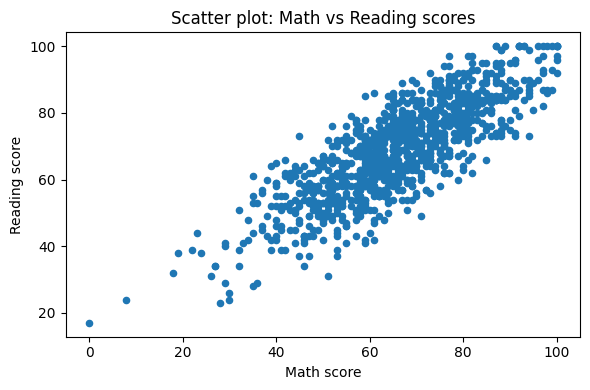

In [19]:
# ==========================
# CHAPTER 12.1 – Scatter plots
# 12.1(a) Basic scatter: math vs reading
# ==========================

plt.figure()
plt.scatter(
    df["math score"],
    df["reading score"],
    s=20  # marker size
)
plt.xlabel("Math score")
plt.ylabel("Reading score")
plt.title("Scatter plot: Math vs Reading scores")
plt.tight_layout()
plt.show()


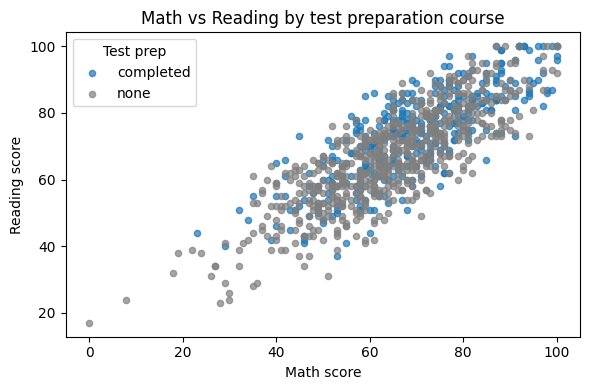

In [20]:
# 12.1(b) Scatter: Math vs Reading, colored by test prep

prep_colors = {
    "none": "tab:gray",
    "completed": "tab:blue"
}

plt.figure()
for prep, subset in df.groupby("test preparation course"):
    plt.scatter(
        subset["math score"],
        subset["reading score"],
        s=20,
        alpha=0.7,   # slight transparency to reduce overplotting
        label=prep,
        c=prep_colors.get(prep, "tab:orange")
    )

plt.xlabel("Math score")
plt.ylabel("Reading score")
plt.title("Math vs Reading by test preparation course")
plt.legend(title="Test prep")
plt.tight_layout()
plt.show()


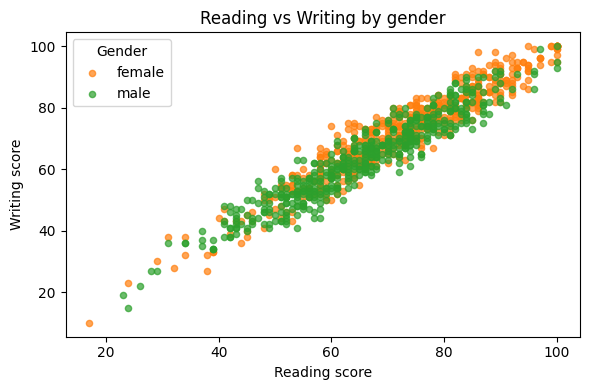

In [21]:
# 12.1(c) Scatter: Reading vs Writing, colored by gender

gender_colors = {
    "female": "tab:orange",
    "male": "tab:green"
}

plt.figure()
for g, subset in df.groupby("gender"):
    plt.scatter(
        subset["reading score"],
        subset["writing score"],
        s=20,
        alpha=0.7,
        label=g,
        c=gender_colors.get(g, "tab:blue")
    )

plt.xlabel("Reading score")
plt.ylabel("Writing score")
plt.title("Reading vs Writing by gender")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()


Figure 12.1(a) shows a basic scatter plot of math score versus reading score.

The points form a clear upward cloud, indicating a strong positive association: students with higher math scores also tend to have higher reading scores.

Figure 12.1(b) colors the same scatter plot by test-preparation course.

Students who completed the test-preparation course (blue) tend to cluster in the upper-right region (high math and reading scores), while students with no prep (gray) are more spread out and more common at lower scores. This shows how scatter plots can incorporate a third variable via color to reveal group differences.

Figure 12.1(c) shows reading score versus writing score, colored by gender.

The relationship between reading and writing scores is almost perfectly linear and positive, with both genders following the same general pattern. Any gender differences are subtle compared to the strong overall association between the two quantitative variables.

Correlation matrix:
                math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000 



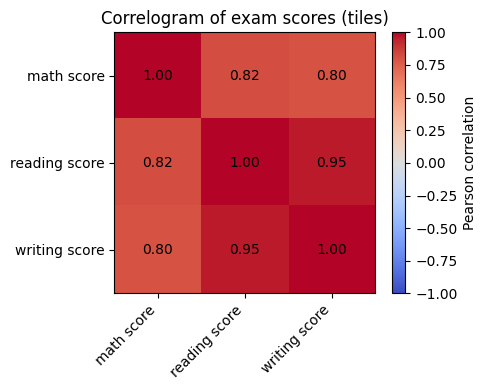

In [22]:
# ==========================
# CHAPTER 12.2 – Correlograms
# 12.2(a) Colored tiles for correlation matrix
# ==========================

import numpy as np
import matplotlib.pyplot as plt

num_cols = ["math score", "reading score", "writing score"]

# Compute Pearson correlation matrix
corr = df[num_cols].corr()
print("Correlation matrix:\n", corr, "\n")

plt.figure(figsize=(5, 4))

# Show correlation matrix as image
im = plt.imshow(corr, vmin=-1, vmax=1, cmap="coolwarm")

# Add ticks and labels
plt.xticks(range(len(num_cols)), num_cols, rotation=45, ha="right")
plt.yticks(range(len(num_cols)), num_cols)

# Annotate each cell with the correlation value
for i in range(len(num_cols)):
    for j in range(len(num_cols)):
        val = corr.iloc[i, j]
        plt.text(
            j, i,
            f"{val:.2f}",
            ha="center",
            va="center",
            color="black"
        )

# Colorbar for correlation scale
cbar = plt.colorbar(im)
cbar.set_label("Pearson correlation")

plt.title("Correlogram of exam scores (tiles)")
plt.tight_layout()
plt.show()


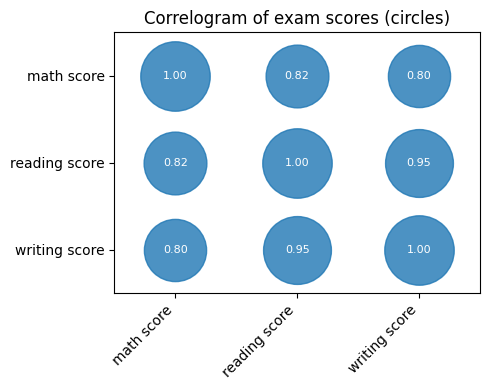

In [24]:
# 12.2(b) Circle correlogram: color = sign, size = |r|

plt.figure(figsize=(5, 4))

# Create grid coordinates for cells
x_positions = np.arange(len(num_cols))
y_positions = np.arange(len(num_cols))

for i, y in enumerate(y_positions):
    for j, x in enumerate(x_positions):
        r = corr.iloc[i, j]

        # Size proportional to |r|
        size = 2500 * abs(r)   # tweak factor for nicer size

        # Color: positive = blue-ish, negative = red-ish
        if r >= 0:
            color = "tab:blue"
        else:
            color = "tab:red"

        plt.scatter(
            x,
            y,
            s=size,
            c=color,
            alpha=0.8
        )

        # Optional: text label with numeric value
        plt.text(
            x,
            y,
            f"{r:.2f}",
            ha="center",
            va="center",
            color="white",
            fontsize=8
        )

# Axes formatting
plt.xticks(x_positions, num_cols, rotation=45, ha="right")
plt.yticks(y_positions, num_cols)
plt.xlim(-0.5, len(num_cols) - 0.5)
plt.ylim(len(num_cols) - 0.5, -0.5)  # flip y for matrix look

plt.title("Correlogram of exam scores (circles)")
plt.tight_layout()
plt.show()


Figure 12.2(a) – Correlogram with colored tiles.
I computed the Pearson correlation matrix for math, reading, and writing scores and displayed it as a tile plot. All off-diagonal correlations are strongly positive (around 0.8–0.95), meaning that students who do well on one exam tend to do well on the others. The color scale from blue to red encodes correlation strength and sign, similar to the correlogram example in the textbook. 
Claus O. Wilke

Figure 12.2(b) – Circle correlogram.
This plot shows the same correlation matrix, but each cell is represented by a circle whose color indicates the sign of the correlation and whose size scales with the absolute value of the correlation coefficient. Large blue circles highlight strong positive relationships (e.g., reading vs. writing), while any correlations near zero would appear as very small circles, visually deemphasizing weak associations as recommended in the chapter

Explained variance ratio by component: [0.90614325 0.07886171 0.01499504]
Cumulative explained variance: [0.90614325 0.98500496 1.        ]


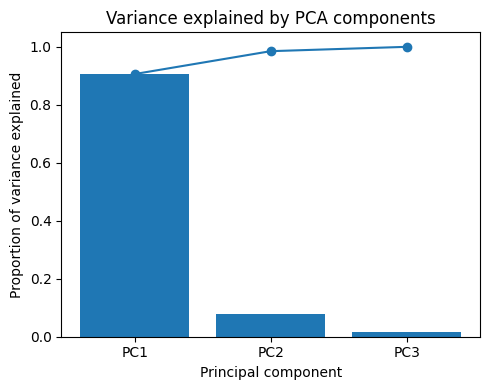

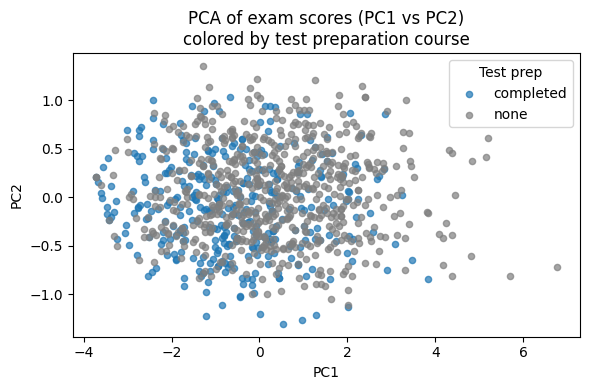

In [25]:
# ==========================
# CHAPTER 12.3 – Dimension reduction (PCA)
# Using math, reading, writing scores
# ==========================

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

num_cols = ["math score", "reading score", "writing score"]

# Drop rows with missing values in these columns
X = df[num_cols].dropna().values

# 1) Standardize the variables (mean=0, std=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2) Fit PCA with up to 3 components (same as number of variables)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio by component:", pca.explained_variance_ratio_)
print("Cumulative explained variance:", np.cumsum(pca.explained_variance_ratio_))

# --------------------------
# 12.3(a) Scree-like bar plot: how much variance each PC explains
# --------------------------

plt.figure(figsize=(5, 4))
pcs = np.arange(1, 4)

plt.bar(pcs, pca.explained_variance_ratio_)
plt.plot(
    pcs,
    np.cumsum(pca.explained_variance_ratio_),
    marker="o"
)
plt.xticks(pcs, [f"PC{i}" for i in pcs])
plt.xlabel("Principal component")
plt.ylabel("Proportion of variance explained")
plt.title("Variance explained by PCA components")
plt.tight_layout()
plt.show()

# --------------------------
# 12.3(b) Scatter plot of first two PCs, colored by test prep
# --------------------------

pc1 = X_pca[:, 0]
pc2 = X_pca[:, 1]

prep_colors = {
    "none": "tab:gray",
    "completed": "tab:blue"
}

plt.figure(figsize=(6, 4))

# Need matching subset of df without missing exam scores
df_pca = df[num_cols + ["test preparation course"]].dropna()

for prep, subset in df_pca.groupby("test preparation course"):
    # indices of this group in the PCA output (same order as dropna)
    idx = subset.index
    plt.scatter(
        pc1[idx - df_pca.index[0]],  # align indices if they don't start at 0
        pc2[idx - df_pca.index[0]],
        s=20,
        alpha=0.7,
        label=prep,
        c=prep_colors.get(prep, "tab:orange")
    )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of exam scores (PC1 vs PC2)\ncolored by test preparation course")
plt.legend(title="Test prep")
plt.tight_layout()
plt.show()


Figure 12.3(a) – Variance explained by PCA.

I applied principal component analysis (PCA) to the three standardized exam scores (math, reading, writing). The bar/line plot shows how much variance each principal component explains. The first component (PC1) explains most of the total variance, while PC2 and PC3 contribute much less. This indicates that a single underlying dimension—roughly “overall exam performance”—captures most of the variation in these three scores.

Figure 12.3(b) – PC1 vs PC2 scatter plot colored by test-preparation course.

The scatter plot shows the first two principal components. Each point is a student; color indicates whether they completed the test-preparation course. PC1 separates students largely by overall performance: higher PC1 values correspond to higher scores on all three exams. Students who completed test prep tend to lie toward the higher-PC1 region, reinforcing what we saw in the original scatter plots. PC2 mostly captures smaller differences between the individual exams. PCA thus reduces the three correlated exam scores to two new variables that summarize performance while retaining most of the structure in the data.

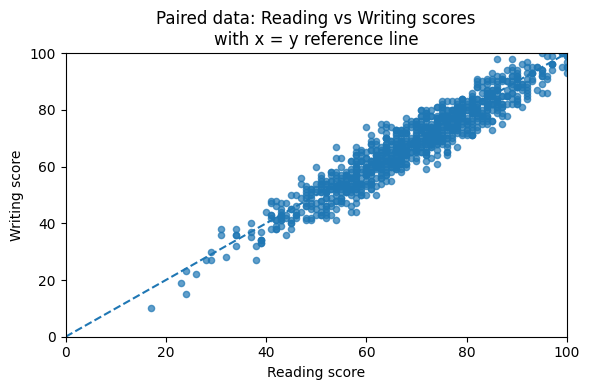

In [26]:
# ==========================
# CHAPTER 12.4 – Paired data
# 12.4(a) Scatter of reading vs writing with x = y line
# ==========================

import numpy as np
import matplotlib.pyplot as plt

# Keep only rows with both scores
paired = df.dropna(subset=["reading score", "writing score"])

x = paired["reading score"]
y = paired["writing score"]

plt.figure()

# Scatter of paired measurements (one point per student)
plt.scatter(x, y, s=20, alpha=0.7)

# Diagonal line x = y (no difference between reading and writing)
line_min = 0
line_max = 100
plt.plot(
    [line_min, line_max],
    [line_min, line_max],
    linestyle="--"
)

plt.xlabel("Reading score")
plt.ylabel("Writing score")
plt.title("Paired data: Reading vs Writing scores\nwith x = y reference line")
plt.xlim(line_min, line_max)
plt.ylim(line_min, line_max)
plt.tight_layout()
plt.show()


This scatter plot treats reading and writing scores as paired measurements for each student. The dashed diagonal shows where reading and writing scores would be equal. Most points lie close to the diagonal, indicating that the two tests measure very similar ability. Small deviations above or below the line show students who are slightly stronger in writing or reading, respectively. This mirrors the textbook’s example where paired CO₂ measurements for countries are plotted against a diagonal x = y line to highlight systematic differences

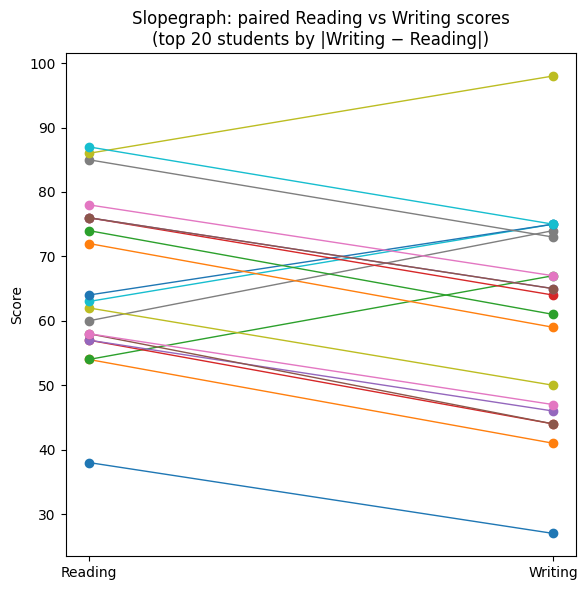

In [27]:
# 12.4(b) Slopegraph: Reading vs Writing for students
# with the largest differences

import matplotlib.pyplot as plt

# Start from same paired data
slope_df = df.dropna(subset=["reading score", "writing score"]).copy()

# Give each row a simple ID for plotting (Student 1, 2, 3, ...)
slope_df["student_id"] = np.arange(len(slope_df)) + 1

# Difference writing - reading
slope_df["diff"] = slope_df["writing score"] - slope_df["reading score"]

# Select, for example, 20 students with largest absolute difference
top_n = 20
sel = slope_df.loc[
    slope_df["diff"].abs().sort_values(ascending=False).index[:top_n]
].sort_values("reading score")  # sort just for nicer layout

plt.figure(figsize=(6, 6))

x_positions = [0, 1]  # 0 = Reading, 1 = Writing

for _, row in sel.iterrows():
    y_read = row["reading score"]
    y_write = row["writing score"]

    # Connect the two measurements with a line and mark both ends
    plt.plot(
        x_positions,
        [y_read, y_write],
        marker="o",
        linewidth=1
    )

# Formatting
plt.xticks(x_positions, ["Reading", "Writing"])
plt.ylabel("Score")
plt.title("Slopegraph: paired Reading vs Writing scores\n(top 20 students by |Writing − Reading|)")
plt.tight_layout()
plt.show()


This slopegraph shows paired reading and writing scores for the 20 students with the largest absolute difference between the two tests. Each line connects a student’s reading score (left) to their writing score (right). Lines sloping upwards indicate higher writing than reading scores; lines sloping downwards indicate the opposite. Most lines slope only slightly, confirming that differences are usually small, but a few students show noticeable gaps. This is analogous to Wilke’s slopegraph of CO₂ emissions at two time points, where the slope highlights both direction and magnitude of change for each country.

# CHAPTER 13

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8, 4)

# Daily minimum temperatures in Melbourne (1981–1990)
url_temp = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
temp_df = pd.read_csv(url_temp)

# Parse dates
temp_df["Date"] = pd.to_datetime(temp_df["Date"])
temp_df = temp_df.rename(columns={"Temp": "temp"})
temp_df = temp_df.set_index("Date").sort_index()

print(temp_df.head())
print(temp_df.index.min(), "→", temp_df.index.max())


            temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8
1981-01-01 00:00:00 → 1990-12-31 00:00:00


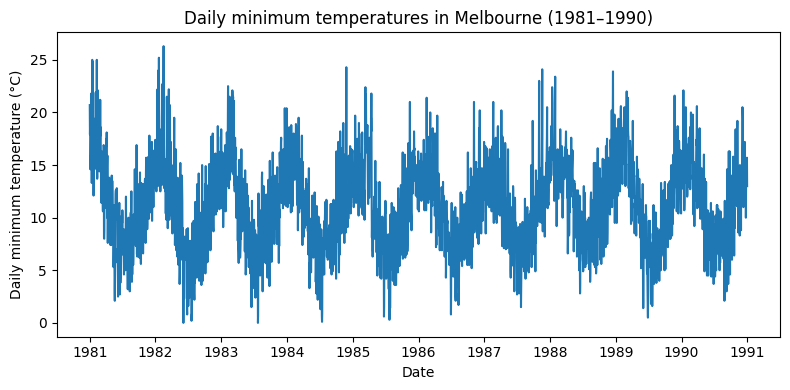

In [29]:
# 13.1(a) Individual time series: full daily temperature line

plt.figure()
plt.plot(temp_df.index, temp_df["temp"])
plt.xlabel("Date")
plt.ylabel("Daily minimum temperature (°C)")
plt.title("Daily minimum temperatures in Melbourne (1981–1990)")
plt.tight_layout()
plt.show()


This line plot shows an individual time series of daily minimum temperatures in Melbourne from 1981 to 1990. The seasonal pattern is visible as regular up-and-down cycles: higher minima in the Australian summer and lower minima in winter. Short-term day-to-day fluctuations ride on top of the longer seasonal trend, matching the chapter’s idea of using a simple line to show how a single quantity evolves over time.

E:\Temp\ipykernel_30524\3818702394.py:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  temp_1y = temp_df[str(year)]


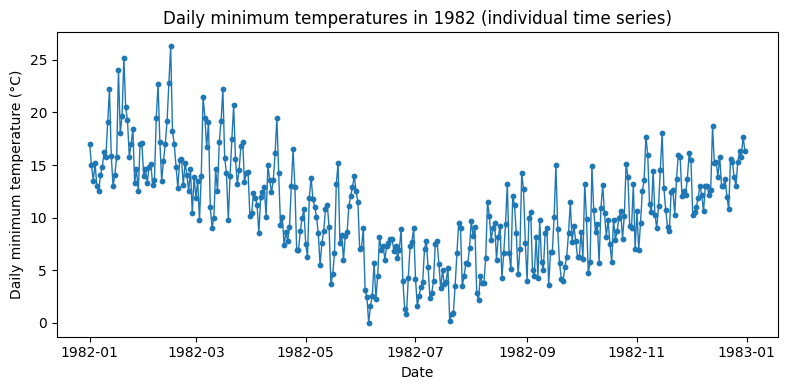

In [30]:
# 13.1(b) Zoomed individual time series for one year with points

year = 1982
temp_1y = temp_df[str(year)]

plt.figure()
plt.plot(temp_1y.index, temp_1y["temp"], linestyle="-", linewidth=1)
plt.scatter(temp_1y.index, temp_1y["temp"], s=10)

plt.xlabel("Date")
plt.ylabel("Daily minimum temperature (°C)")
plt.title(f"Daily minimum temperatures in {year} (individual time series)")
plt.tight_layout()
plt.show()


Focusing on 1982 alone, I plotted the daily minimum temperatures as both a line and individual points. The line reveals the smooth seasonal rise and fall across the year, while the points emphasize that each dot is a separate daily observation. This matches the “individual time series” examples in the textbook, where both the trajectory and the discreteness of the data are important.

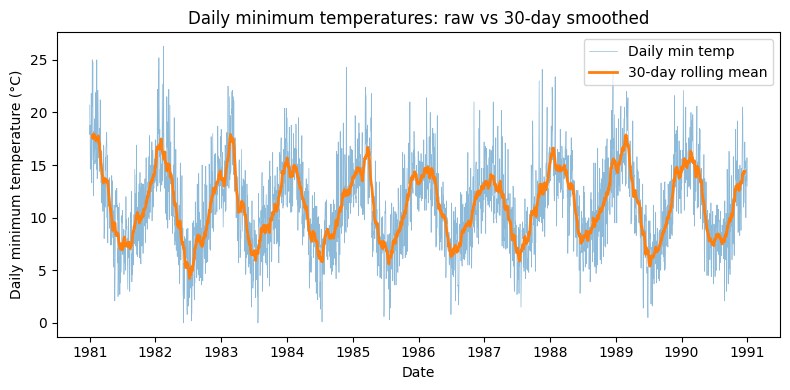

In [31]:
# 13.1(c) Raw vs smoothed individual time series (30-day rolling mean)

temp_df["temp_roll30"] = temp_df["temp"].rolling(window=30, center=True).mean()

plt.figure()
# Raw daily series (light)
plt.plot(
    temp_df.index,
    temp_df["temp"],
    linewidth=0.5,
    alpha=0.5,
    label="Daily min temp"
)

# Smoothed series (emphasize trend)
plt.plot(
    temp_df.index,
    temp_df["temp_roll30"],
    linewidth=2,
    label="30-day rolling mean"
)

plt.xlabel("Date")
plt.ylabel("Daily minimum temperature (°C)")
plt.title("Daily minimum temperatures: raw vs 30-day smoothed")
plt.legend()
plt.tight_layout()
plt.show()


In this figure, the light line shows the raw daily minimum temperatures, and the thicker line shows a 30-day rolling mean as a smoothed version of the same time series. The smoothed curve reveals the underlying seasonal trend more clearly by averaging out short-term fluctuations. This illustrates a key point from Chapter 13: for an individual time series, it is often helpful to show both the noisy day-to-day values and a smoother summary of the long-term pattern.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8, 4)

# temp_df already exists from 13.1:
# url_temp = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
# temp_df = pd.read_csv(url_temp)
# temp_df["Date"] = pd.to_datetime(temp_df["Date"])
# temp_df = temp_df.rename(columns={"Temp": "temp"}).set_index("Date").sort_index()


In [33]:
# Add year and day-of-year columns for easier plotting
temp_df["year"] = temp_df.index.year
temp_df["day_of_year"] = temp_df.index.dayofyear

years = sorted(temp_df["year"].unique())
print("Years in dataset:", years)


Years in dataset: [1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990]


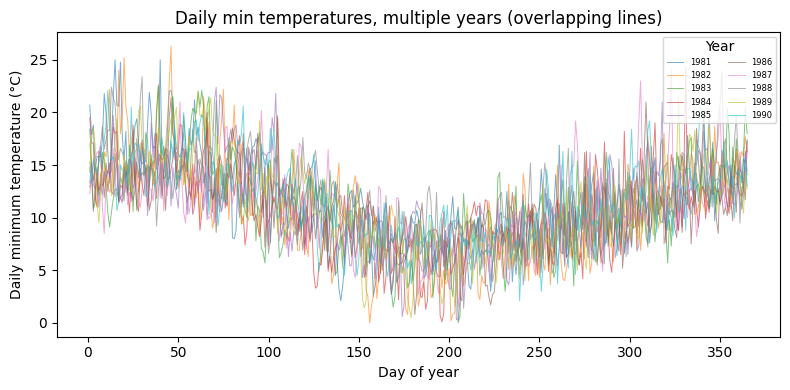

In [34]:
# 13.2(a) BAD example: many time series in one plot (overlapping lines)

plt.figure(figsize=(8, 4))

for year, sub in temp_df.groupby("year"):
    plt.plot(
        sub["day_of_year"],
        sub["temp"],
        linewidth=0.7,
        alpha=0.6,
        label=str(year)
    )

plt.xlabel("Day of year")
plt.ylabel("Daily minimum temperature (°C)")
plt.title("Daily min temperatures, multiple years (overlapping lines)")
# Optional: comment out legend if it is too crowded
plt.legend(title="Year", fontsize=6, ncol=2, loc="upper right")
plt.tight_layout()
plt.show()


This figure plots a separate time series for each year (1981–1990) on the same axes. While it technically shows multiple time series, the result is a “spaghetti plot” where lines overlap heavily. It is hard to follow any single year, and comparing years is difficult. This is a typical “bad” multiple time series design mentioned in the book, where adding many lines to one panel makes the visualization cluttered instead of informative.

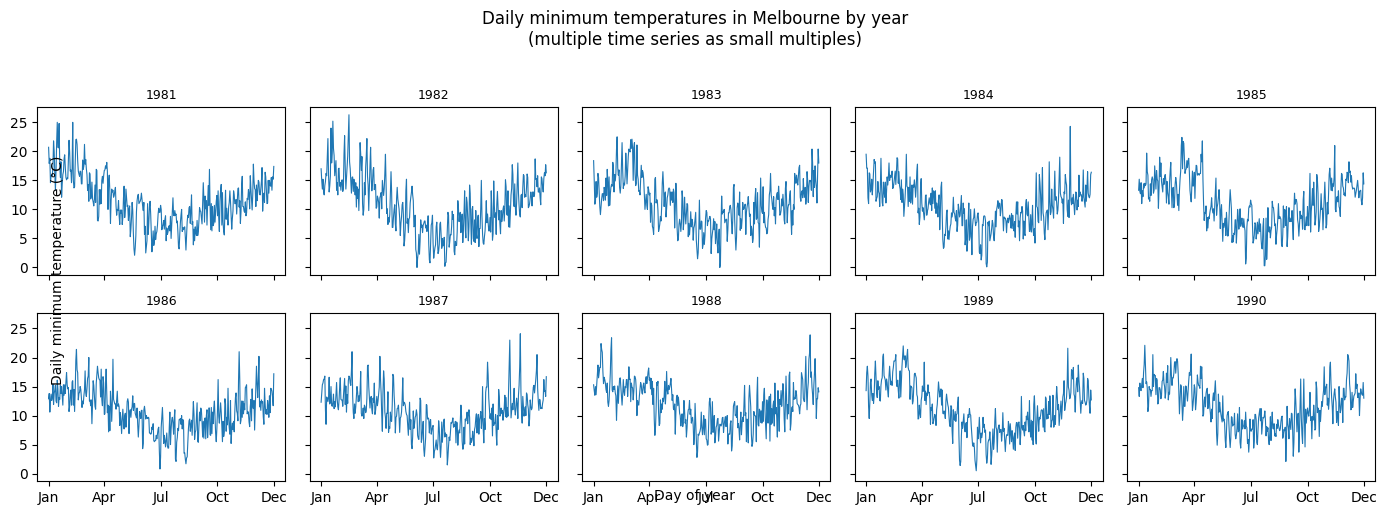

In [35]:
# 13.2(b) BETTER: small multiples (one time series per panel, same scales)

unique_years = sorted(temp_df["year"].unique())
n_years = len(unique_years)

# We have 10 years; 2 rows x 5 columns works nicely
n_rows, n_cols = 2, 5

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5), sharex=True, sharey=True)

for ax, year in zip(axes.flatten(), unique_years):
    sub = temp_df[temp_df["year"] == year]
    ax.plot(
        sub["day_of_year"],
        sub["temp"],
        linewidth=0.8
    )
    ax.set_title(str(year), fontsize=9)
    ax.set_xticks([1, 91, 182, 274, 365])
    ax.set_xticklabels(["Jan", "Apr", "Jul", "Oct", "Dec"])

# Hide any unused axes (if any)
for ax in axes.flatten()[n_years:]:
    ax.set_visible(False)

# Common labels
fig.text(0.5, 0.04, "Day of year", ha="center")
fig.text(0.04, 0.5, "Daily minimum temperature (°C)", va="center", rotation="vertical")
fig.suptitle("Daily minimum temperatures in Melbourne by year\n(multiple time series as small multiples)", y=1.02)

plt.tight_layout()
plt.show()


Here I show the same ten yearly temperature series using small multiples: each panel contains one year, and all panels share the same x and y axes. This design makes it much easier to read the pattern for a single year and to compare years visually. For example, we can see that every year has a similar seasonal cycle, but some winters are slightly colder than others. This follows the chapter’s recommendation to use small multiples or grouped displays for multiple time series instead of overlaid “spaghetti” plots.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

plt.rcParams["figure.figsize"] = (8, 4)

# Daily minimum temperatures (same dataset as 13.1)
url_temp = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
temp_df = pd.read_csv(url_temp)

temp_df["Date"] = pd.to_datetime(temp_df["Date"])
temp_df = (
    temp_df.rename(columns={"Temp": "temp"})
           .set_index("Date")
           .sort_index()
)

print("temp_df columns:", temp_df.columns)

# Monthly mean of daily minimum temps
monthly_ts = temp_df["temp"].resample("M").mean().to_frame("monthly_min_temp")

# Second response variable: 12-month rolling mean (trend)
monthly_ts["trend_12m"] = monthly_ts["monthly_min_temp"].rolling(12, center=True).mean()

print("monthly_ts columns:", monthly_ts.columns)
print(monthly_ts.head())


temp_df columns: Index(['temp'], dtype='object')
monthly_ts columns: Index(['monthly_min_temp', 'trend_12m'], dtype='object')
            monthly_min_temp  trend_12m
Date                                   
1981-01-31         17.712903        NaN
1981-02-28         17.678571        NaN
1981-03-31         13.500000        NaN
1981-04-30         12.356667        NaN
1981-05-31          9.490323        NaN


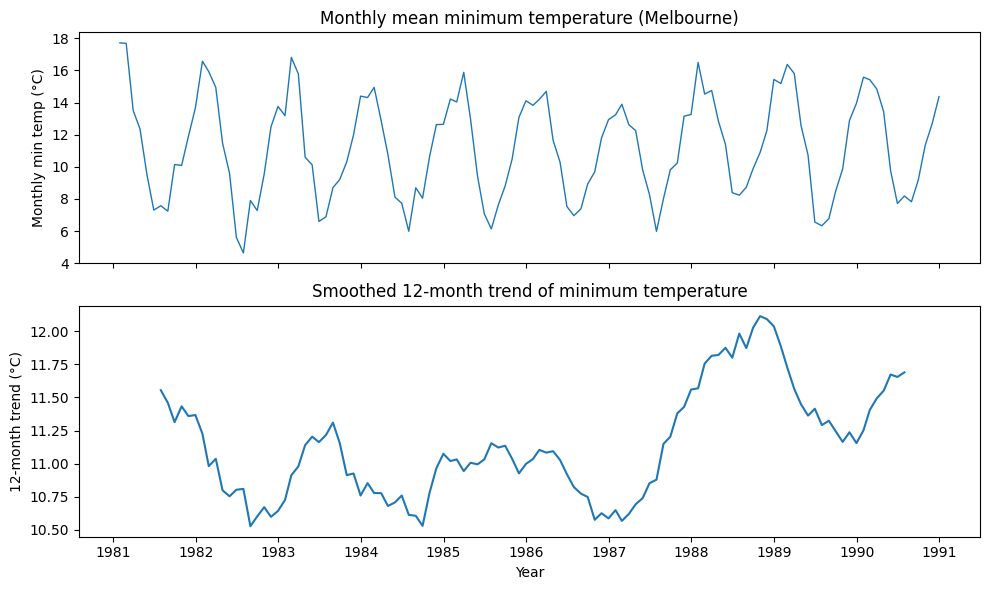

In [43]:
# 13.3(a) Two stacked line graphs:
# response 1 = monthly_min_temp, response 2 = trend_12m

fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Top: raw monthly min temp
axes[0].plot(
    monthly_ts.index,
    monthly_ts["monthly_min_temp"],
    linewidth=1.0
)
axes[0].set_ylabel("Monthly min temp (°C)")
axes[0].set_title("Monthly mean minimum temperature (Melbourne)")

# Bottom: 12-month rolling trend
axes[1].plot(
    monthly_ts.index,
    monthly_ts["trend_12m"],
    linewidth=1.5
)
axes[1].set_ylabel("12-month trend (°C)")
axes[1].set_xlabel("Year")
axes[1].set_title("Smoothed 12-month trend of minimum temperature")

plt.tight_layout()
plt.show()


Figure 13.3(a) – Two stacked time series.
I treated the monthly mean minimum temperature and its 12-month rolling average as two response variables. The top panel shows the raw monthly series, while the bottom panel shows the smoother trend. Both evolve over the same time axis, and the trend highlights longer-term changes by averaging out month-to-month variation. This matches the chapter’s idea of plotting two related response variables in separate stacked panels over time.

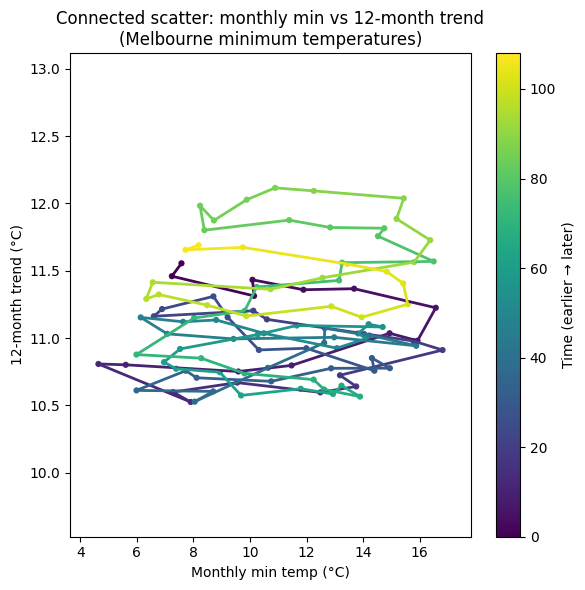

In [44]:
# 13.3(b) Connected scatter: monthly_min_temp vs trend_12m

# Drop NaNs from the rolling trend at start/end
plot_df = monthly_ts.dropna(subset=["trend_12m"]).copy()

x = plot_df["monthly_min_temp"].values
y = plot_df["trend_12m"].values
n = len(plot_df)

# Build line segments between consecutive months
points = np.column_stack([x, y])
segments = np.stack([points[:-1], points[1:]], axis=1)

# Color by time index (0 = earliest, n-1 = latest)
t = np.arange(n)
norm = plt.Normalize(t.min(), t.max())

fig, ax = plt.subplots(figsize=(6, 6))

# Line segments with color gradient
lc = LineCollection(segments, cmap="viridis", norm=norm)
lc.set_array(t[:-1])
lc.set_linewidth(2)
ax.add_collection(lc)

# Scatter points
sc = ax.scatter(
    x,
    y,
    c=t,
    cmap="viridis",
    s=20,
    edgecolor="none"
)

# Colorbar for time
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label("Time (earlier → later)")

ax.set_xlabel("Monthly min temp (°C)")
ax.set_ylabel("12-month trend (°C)")
ax.set_title("Connected scatter: monthly min vs 12-month trend\n(Melbourne minimum temperatures)")

ax.set_xlim(x.min() - 1, x.max() + 1)
ax.set_ylim(y.min() - 1, y.max() + 1)

plt.tight_layout()
plt.show()


The connected scatter plot uses monthly mean minimum temperature on the x-axis and the 12-month trend on the y-axis, with consecutive months connected and colored by time. Points near the diagonal indicate that the current month is close to the long-term trend, while points far from the diagonal highlight unusually warm or cold months relative to that trend. The time coloring shows how the relationship between the two responses evolves, similar to the book’s example of connected scatterplots for two macroeconomic indicators.